In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
df = pd.read_csv('../bodyPerformance.csv')

In [15]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [17]:
df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [18]:
df.eq(0).sum()

age                          0
gender                       0
height_cm                    0
weight_kg                    0
body fat_%                   0
diastolic                    1
systolic                     1
gripForce                    3
sit and bend forward_cm     12
sit-ups counts             125
broad jump_cm               10
class                        0
dtype: int64

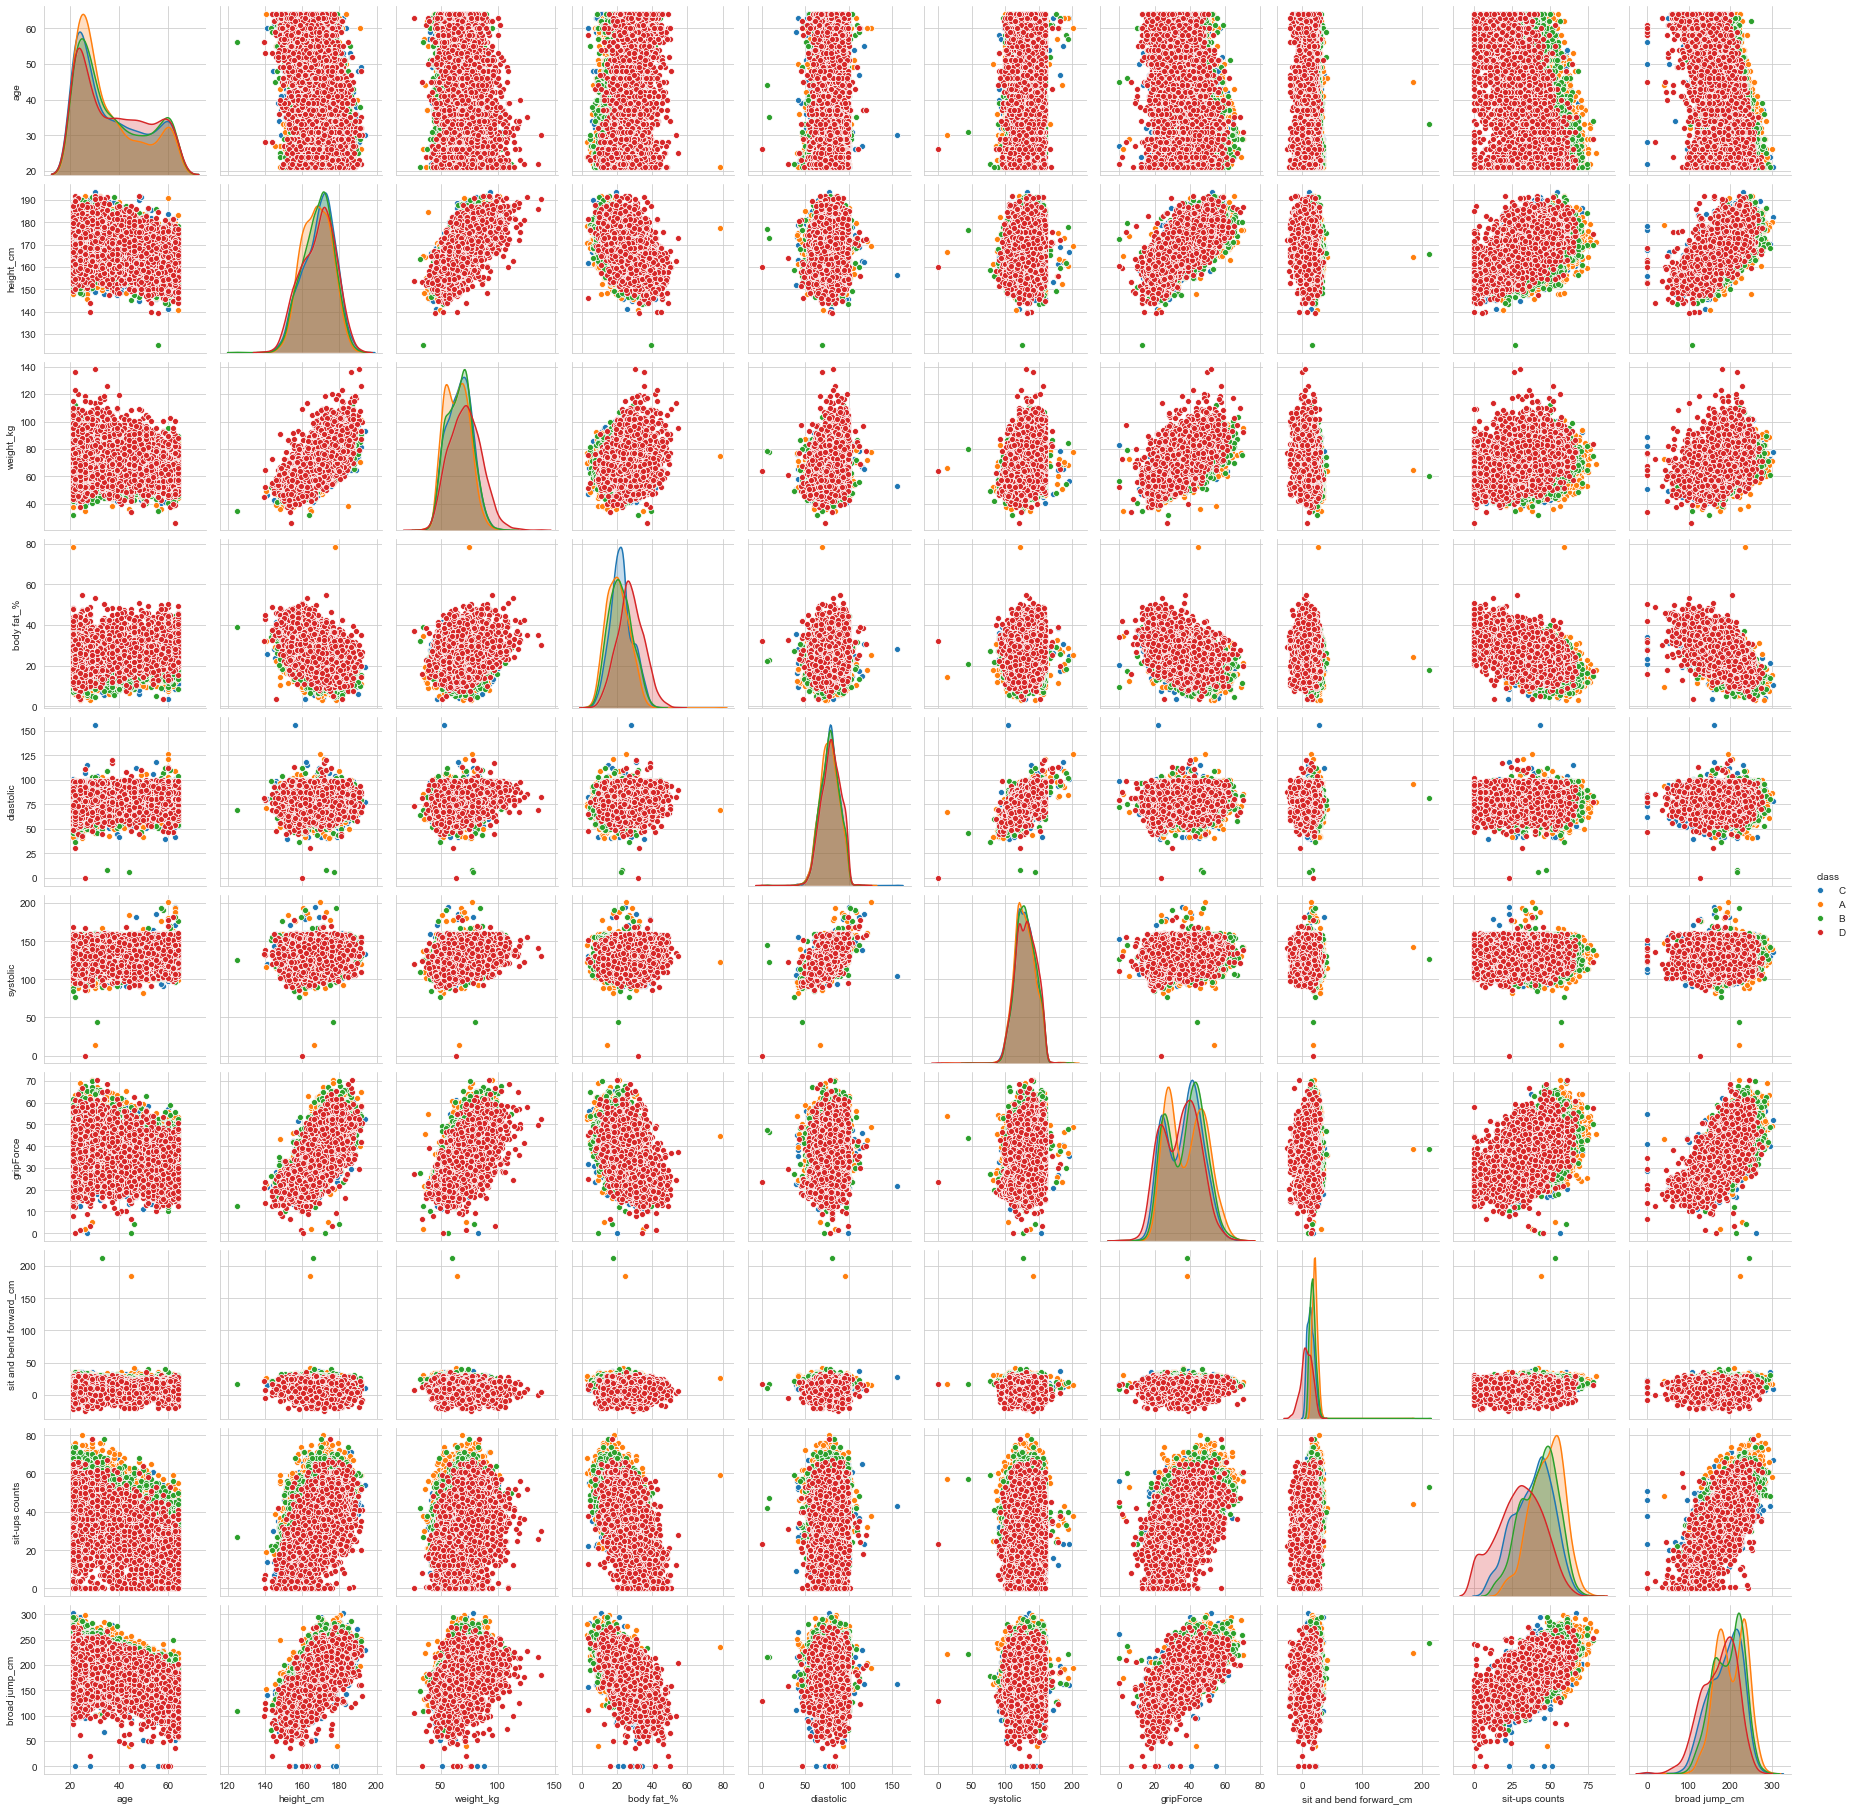

In [19]:
sns.pairplot(data=df, hue='class')

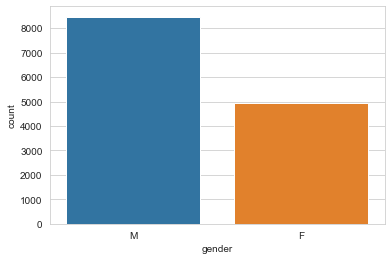

In [20]:
# see the gender proportion
sns.countplot(x='gender',data=df)

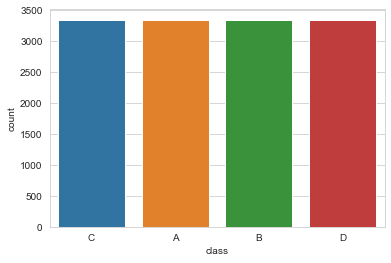

In [36]:
# see the class proportion
sns.countplot(x='class',data=df)

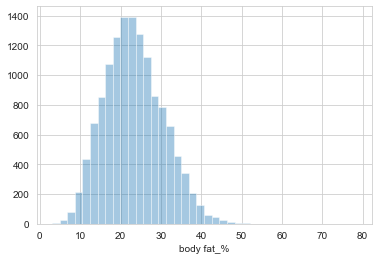

In [33]:
# distribution of the body fat % in the data set
sns.distplot(df['body fat_%'],kde=False,bins=40)

In [34]:
df.corr()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
age,1.000000,-0.293980,-0.099966,0.242302,0.158508,0.211167,-0.179583,-0.070033,-0.544581,-0.435172
height_cm,-0.293980,1.000000,0.734909,-0.515440,0.145933,0.210186,0.735024,-0.221970,0.500424,0.674589
weight_kg,-0.099966,0.734909,1.000000,-0.084065,0.262317,0.338943,0.700119,-0.296249,0.294899,0.479564
body fat_%,0.242302,-0.515440,-0.084065,1.000000,0.048059,-0.030376,-0.541788,-0.071225,-0.608912,-0.673273
diastolic,0.158508,0.145933,0.262317,0.048059,1.000000,0.676309,0.202062,-0.072098,0.016547,0.097243
systolic,0.211167,0.210186,0.338943,-0.030376,0.676309,1.000000,0.286012,-0.082434,0.056276,0.152894
gripForce,-0.179583,0.735024,0.700119,-0.541788,0.202062,0.286012,1.000000,-0.112577,0.576669,0.746853
sit and bend forward_cm,-0.070033,-0.221970,-0.296249,-0.071225,-0.072098,-0.082434,-0.112577,1.000000,0.177153,0.026487
sit-ups counts,-0.544581,0.500424,0.294899,-0.608912,0.016547,0.056276,0.576669,0.177153,1.000000,0.748273
broad jump_cm,-0.435172,0.674589,0.479564,-0.673273,0.097243,0.152894,0.746853,0.026487,0.748273,1.000000


(10.0, 0.0)

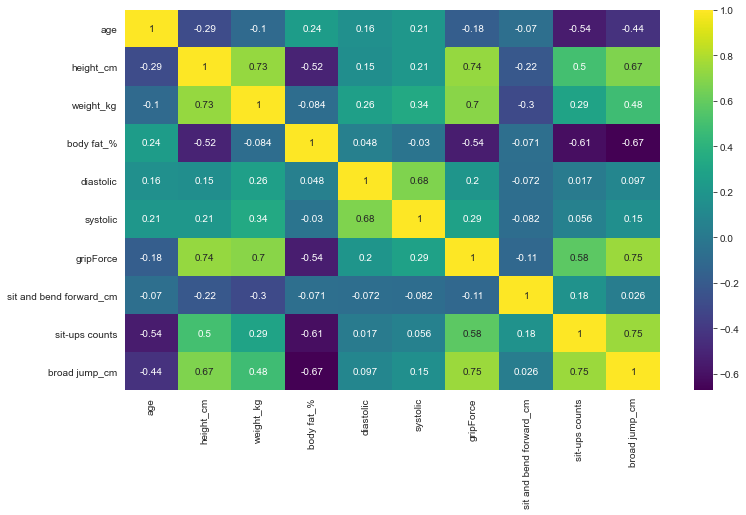

In [35]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)

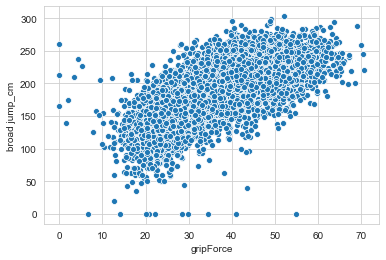

In [38]:
# There is a correlation between grip froce and broad jump distance
sns.scatterplot(x='gripForce',y='broad jump_cm',data=df)

In [57]:
# Creating ordered index for classes (Alhabetically)
my_order = df.groupby('class')['sit-ups counts'].mean().index

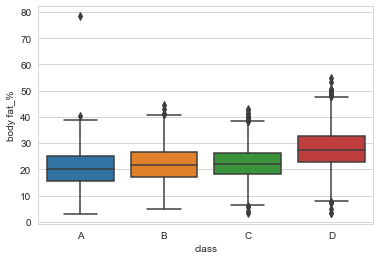

In [58]:
# body fat percentage by classes
sns.boxplot(x='class',y='body fat_%',data=df, order=my_order)

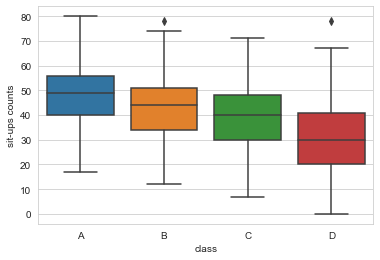

In [59]:
# body fat percentage by classes
sns.boxplot(x='class',y='sit-ups counts',data=df, order= my_order)